<h1><a href="www.kaggle.com/devinanzelmo/dota-2-matches">DotA2 Matches dataset</a></h1>

<h2>Описание</h2>
<p>Набор содержит 50000 тысяч матчей ранговых игр. Этот датасет предназначет для оценки поведения игроков, их уровня игры, продолжительности игр, сражений и т.д.</p>
<p>Данные из этого датасета могут использоваться для анализа актуальности выбора определенных героев и предметов, общей модели поведения игроков и девиаций из нее и многого другого. Эти данные полезны, например, при разработке новых обновлений для игры, усовершенствования систем матчмейкинга или наказаний за несоответствующее поведение игроков и прочее.</p>

<div style="padding-left: 2em;">
    <h3>Уточнение для данного задания</h3>
    <p>Для анализа в этом задании выбрана часть датасета с данными по игрокам и героям, на которых они играли конкретный матч. Так как атрибутов получается достаточно много, здесь мы опишем лишь некоторые из них в качестве примера.</p>
</div>

In [11]:
import numpy as np
import pandas as pd

<div style="border: #000000 1px solid; border-radius: 5px; padding: 1em;">
    <h2>Описание выбранных для анализа атрибутов</h2>
    <ul>
        <li> <?--Начало шаблона--?>
            <h4>match_id</h4>
            <table border="1" >
                <tr>
                    <th>Шкала</th>
                    <th>Диапазон/Набор значений</th>
                    <th>Среднее значение/мода</th>
                </tr>
                <tr>
                    <td>фыв</td>
                    <td>фыв</td>
                    <td>фыв</td>
                </tr>
            </table>
        </li> <?--Конец шаблона--?>
    </ul>
</div>

In [165]:
#Данные по игрокам
players = pd.read_csv('dataset/players.csv')

#Уточняющие данные по героям
heroes = pd.read_csv('dataset/hero_names.csv')

#Соединяем две эти выборки, чтобы можно было получить конкретное имя выбранного игроком героя, вместо id
merged = players.merge(heroes, 'left', on = ["hero_id"])

#Список атрибутов, которые нас интересуют
attrib = ["match_id", "account_id", "localized_name", "player_slot", "gold_spent",
          "gold_per_min", "gold_death", "gold_buyback", "gold_abandon", "gold_sell", "gold_destroying_structure",
          "gold_killing_heros", "gold_killing_creeps", "gold_killing_roshan", "gold_killing_couriers", "gold_other",
          "xp_per_min", "xp_hero", "xp_creep", "xp_roshan", "xp_other", "kills", "deaths", "assists", "denies",
          "last_hits", "stuns", "hero_damage", "hero_healing", "tower_damage", "level", "leaver_status"]

#Пример выборки
merged[attrib]

,match_id,account_id,localized_name,player_slot,gold_spent,gold_per_min,gold_death,gold_buyback,gold_abandon,gold_sell,...,deaths,assists,denies,last_hits,stuns,hero_damage,hero_healing,tower_damage,level,leaver_status
0,0,0,Rubick,0,10960,347,-957.0,NaN,NaN,212.0,...,3,18,1,30,76.7356,8690,218,143,16,0
1,0,1,Clockwerk,1,17760,494,-1137.0,NaN,NaN,1650.0,...,3,18,9,109,87.4164,23747,0,423,22,0
2,0,0,Treant Protector,2,12195,350,-1436.0,-1015.0,NaN,NaN,...,4,15,1,58,None,4217,1595,399,17,0
3,0,2,Shadow Fiend,3,22505,599,-2156.0,NaN,NaN,938.0,...,4,19,6,271,None,14832,2714,6055,21,0
4,0,3,Spectre,4,23825,613,-1437.0,-1056.0,NaN,4194.0,...,3,17,13,245,None,33740,243,1833,24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,49999,0,Tusk,128,17735,468,-4131.0,NaN,NaN,237.0,...,9,16,2,70,54.4912,22127,0,1227,23,0
499996,49999,0,Mirana,129,20815,507,-2274.0,NaN,NaN,1587.0,...,6,11,7,115,43.0999,12381,0,2269,23,0
499997,49999,0,Keeper of the Light,130,16225,371,-1287.0,NaN,NaN,NaN,...,3,11,2,92,18.1353,7050,872,87,18,0
499998,49999,0,Alchemist,131,31015,780,-3084.0,-1681.0,NaN,1107.0,...,6,17,6,306,64.3631,16474,0,2851,25,0


In [230]:
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Визуализация отдельных показателей</h2>

<h4>Распределение количества потраченного золота</h4>

<AxesSubplot:xlabel='gold_spent', ylabel='Count'>

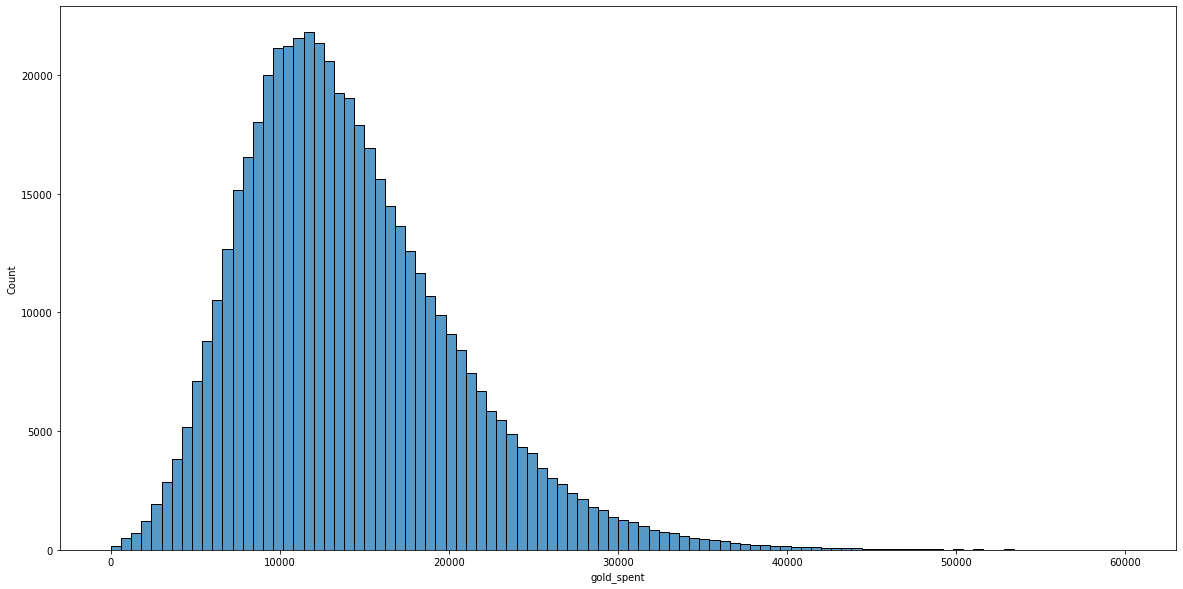

In [166]:
fig = plt.figure(figsize = (20, 10))
sns.histplot(x = "gold_spent", data = merged, bins = 100, binrange = (0, 60000))

<h4>Количество игроков c разным статусом подключения</h4>
<p><i>0 - не покидал матч, 1 - отключался, 2 - отключился на слишком длительное время и покинул игру, 3 - покинул игру, 4 - афк</i></p>

<AxesSubplot:xlabel='leaver_status', ylabel='count'>

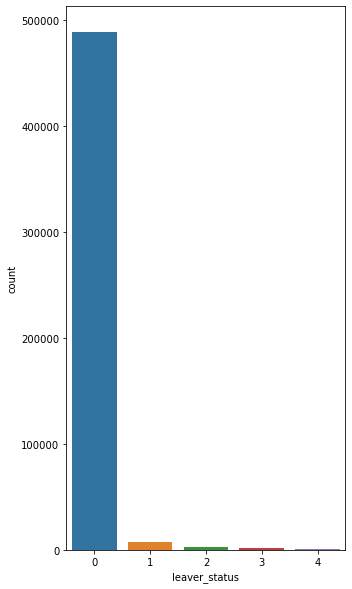

In [167]:
fig = plt.figure(figsize = (5, 10))
sns.countplot(x = "leaver_status", data = merged)

<h4>Частота выбора героев</h4>

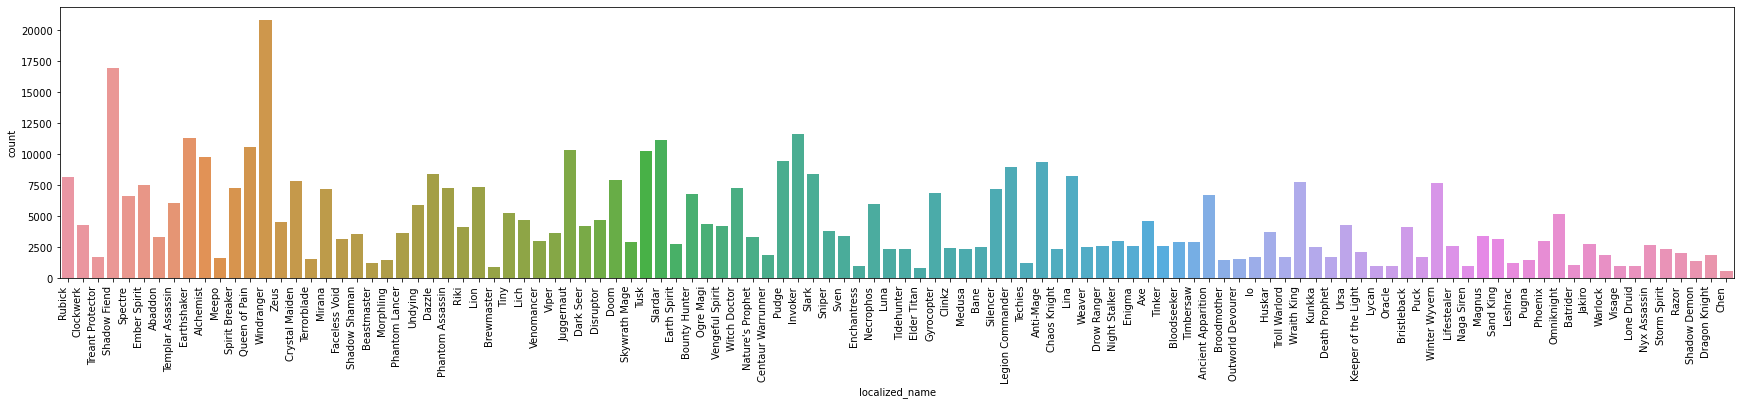

In [184]:
fig = plt.figure(figsize = (30, 5))
gr = sns.countplot(x = "localized_name", data = merged)
gr.set_xticklabels(gr.get_xticklabels(), rotation = 90, ha = "right")
plt.show()

<h4>Распределение золота в минуту</h4>

<AxesSubplot:xlabel='gold_per_min', ylabel='Count'>

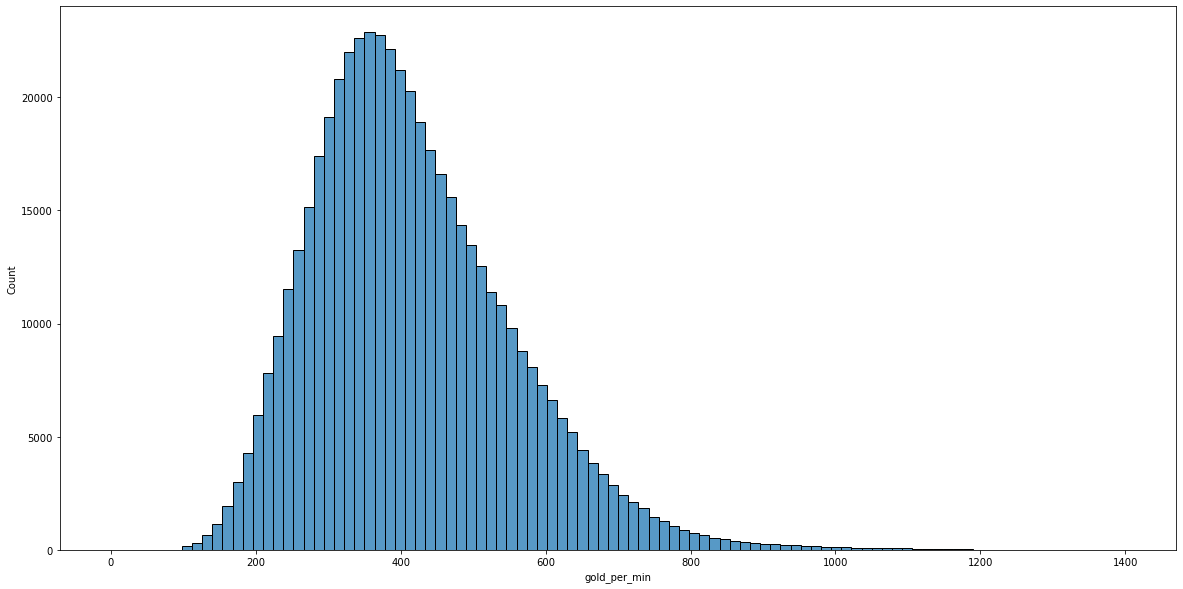

In [186]:
fig = plt.figure(figsize = (20,10))
sns.histplot(x = "gold_per_min", data = merged, bins = 100, binrange = (0, 1400))

<h4>График распределения игроков по командам и слотам в команде</h4>

<AxesSubplot:xlabel='player_slot', ylabel='count'>

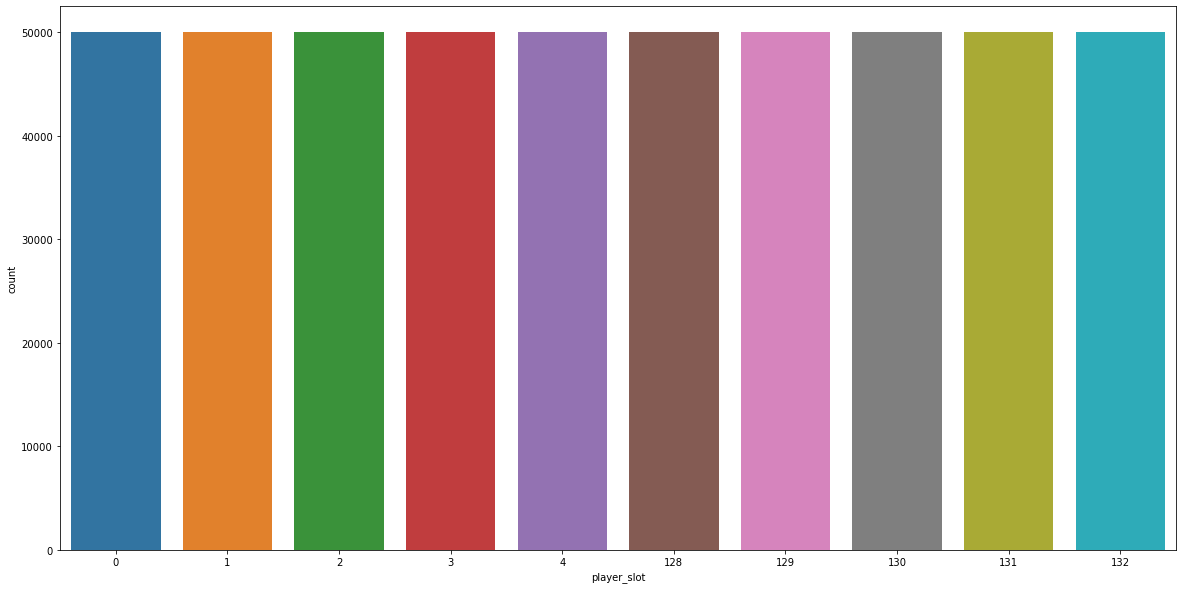

In [187]:
fig = plt.figure(figsize = (20,10))
sns.countplot(x = "player_slot", data = merged)

<h4>Распределение времени стана</h4>

<AxesSubplot:xlabel='stuns', ylabel='Count'>

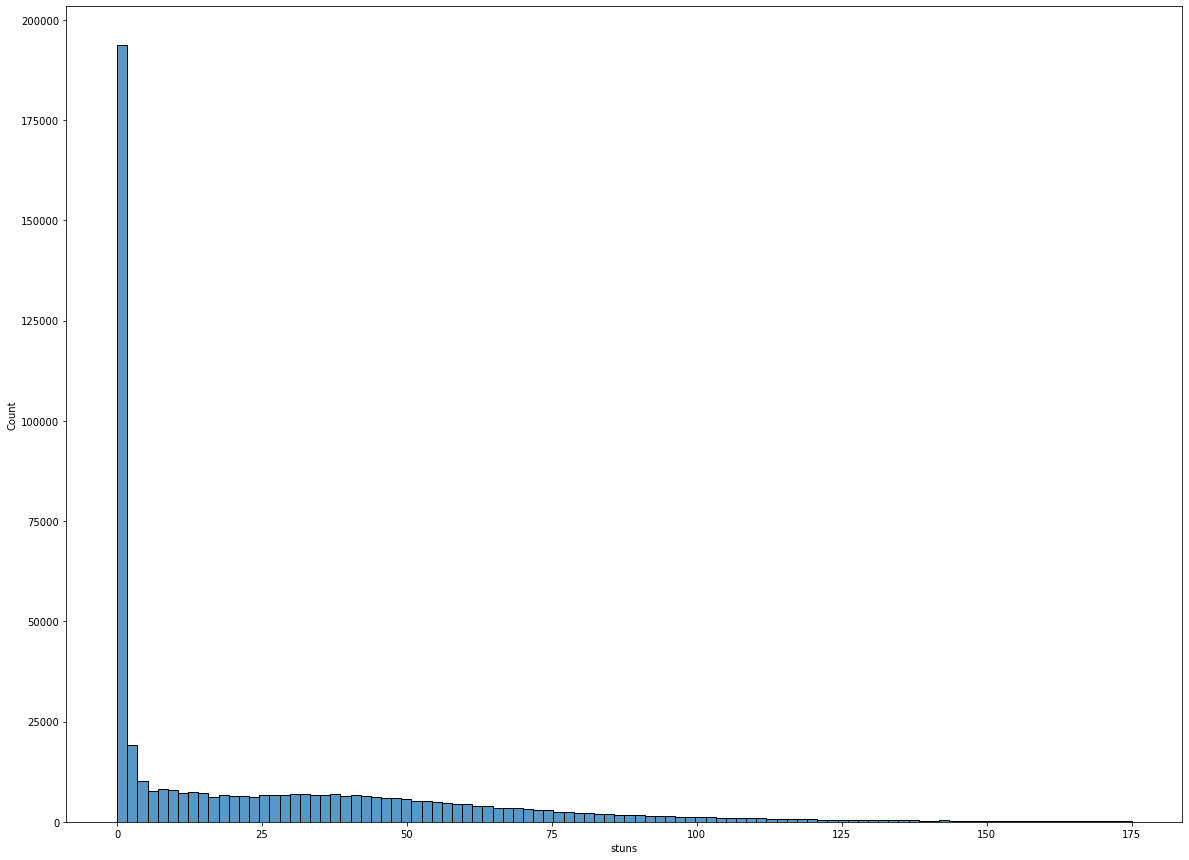

In [208]:
merged = merged.mask(merged.stuns == "None", "0")
merged.stuns = merged.stuns.astype(float);
fig = plt.figure(figsize = (20,15))
sns.histplot(x = "stuns", data = merged, bins = 100, binrange = (0, 175))

TypeError: 'bool' object is not iterable

In [224]:
group_heroes = merged.groupby("localized_name")
for localized_name, g in group_heroes:
    print("Hero: {0:30} mean gpm: {1:10.10f}".format(localized_name, g["gold_per_min"].mean()))

Hero: 0                              mean gpm: 0.0000000000
Hero: Abaddon                        mean gpm: 445.8839662447
Hero: Alchemist                      mean gpm: 712.1417435897
Hero: Ancient Apparition             mean gpm: 313.5942275042
Hero: Anti-Mage                      mean gpm: 557.9484346225
Hero: Axe                            mean gpm: 429.0316455696
Hero: Bane                           mean gpm: 295.4092512740
Hero: Batrider                       mean gpm: 363.0742857143
Hero: Beastmaster                    mean gpm: 384.6831210191
Hero: Bloodseeker                    mean gpm: 499.0074906367
Hero: Bounty Hunter                  mean gpm: 412.7790594499
Hero: Brewmaster                     mean gpm: 399.6757049892
Hero: Bristleback                    mean gpm: 484.5454545455
Hero: Broodmother                    mean gpm: 511.9236641221
Hero: Centaur Warrunner              mean gpm: 387.4735991379
Hero: Chaos Knight                   mean gpm: 443.4058898848
Hero: Chen

TypeError: 'builtin_function_or_method' object is not subscriptable